# Composition of concrete mix

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
demo = pd.read_csv("concrete.csv")
demo.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Checking correlation of elements in concrete mix
Observation from below heatmap : No strong Correlation

<AxesSubplot:>

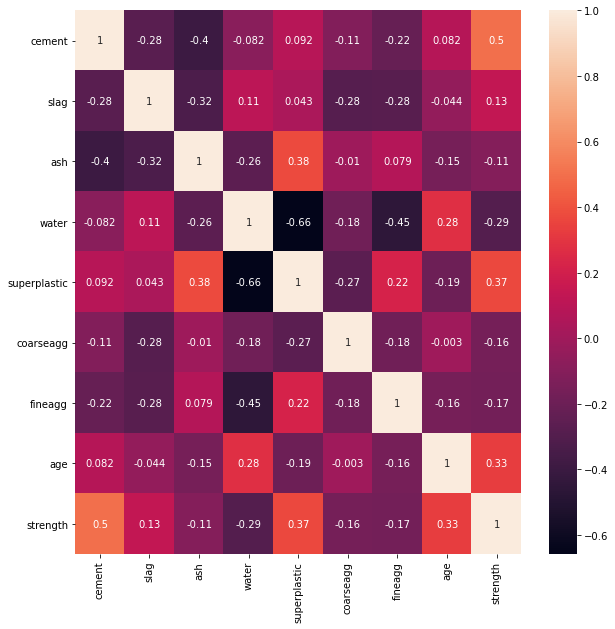

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(demo.corr(), annot=True)

# Analysing Skewness using pairplot

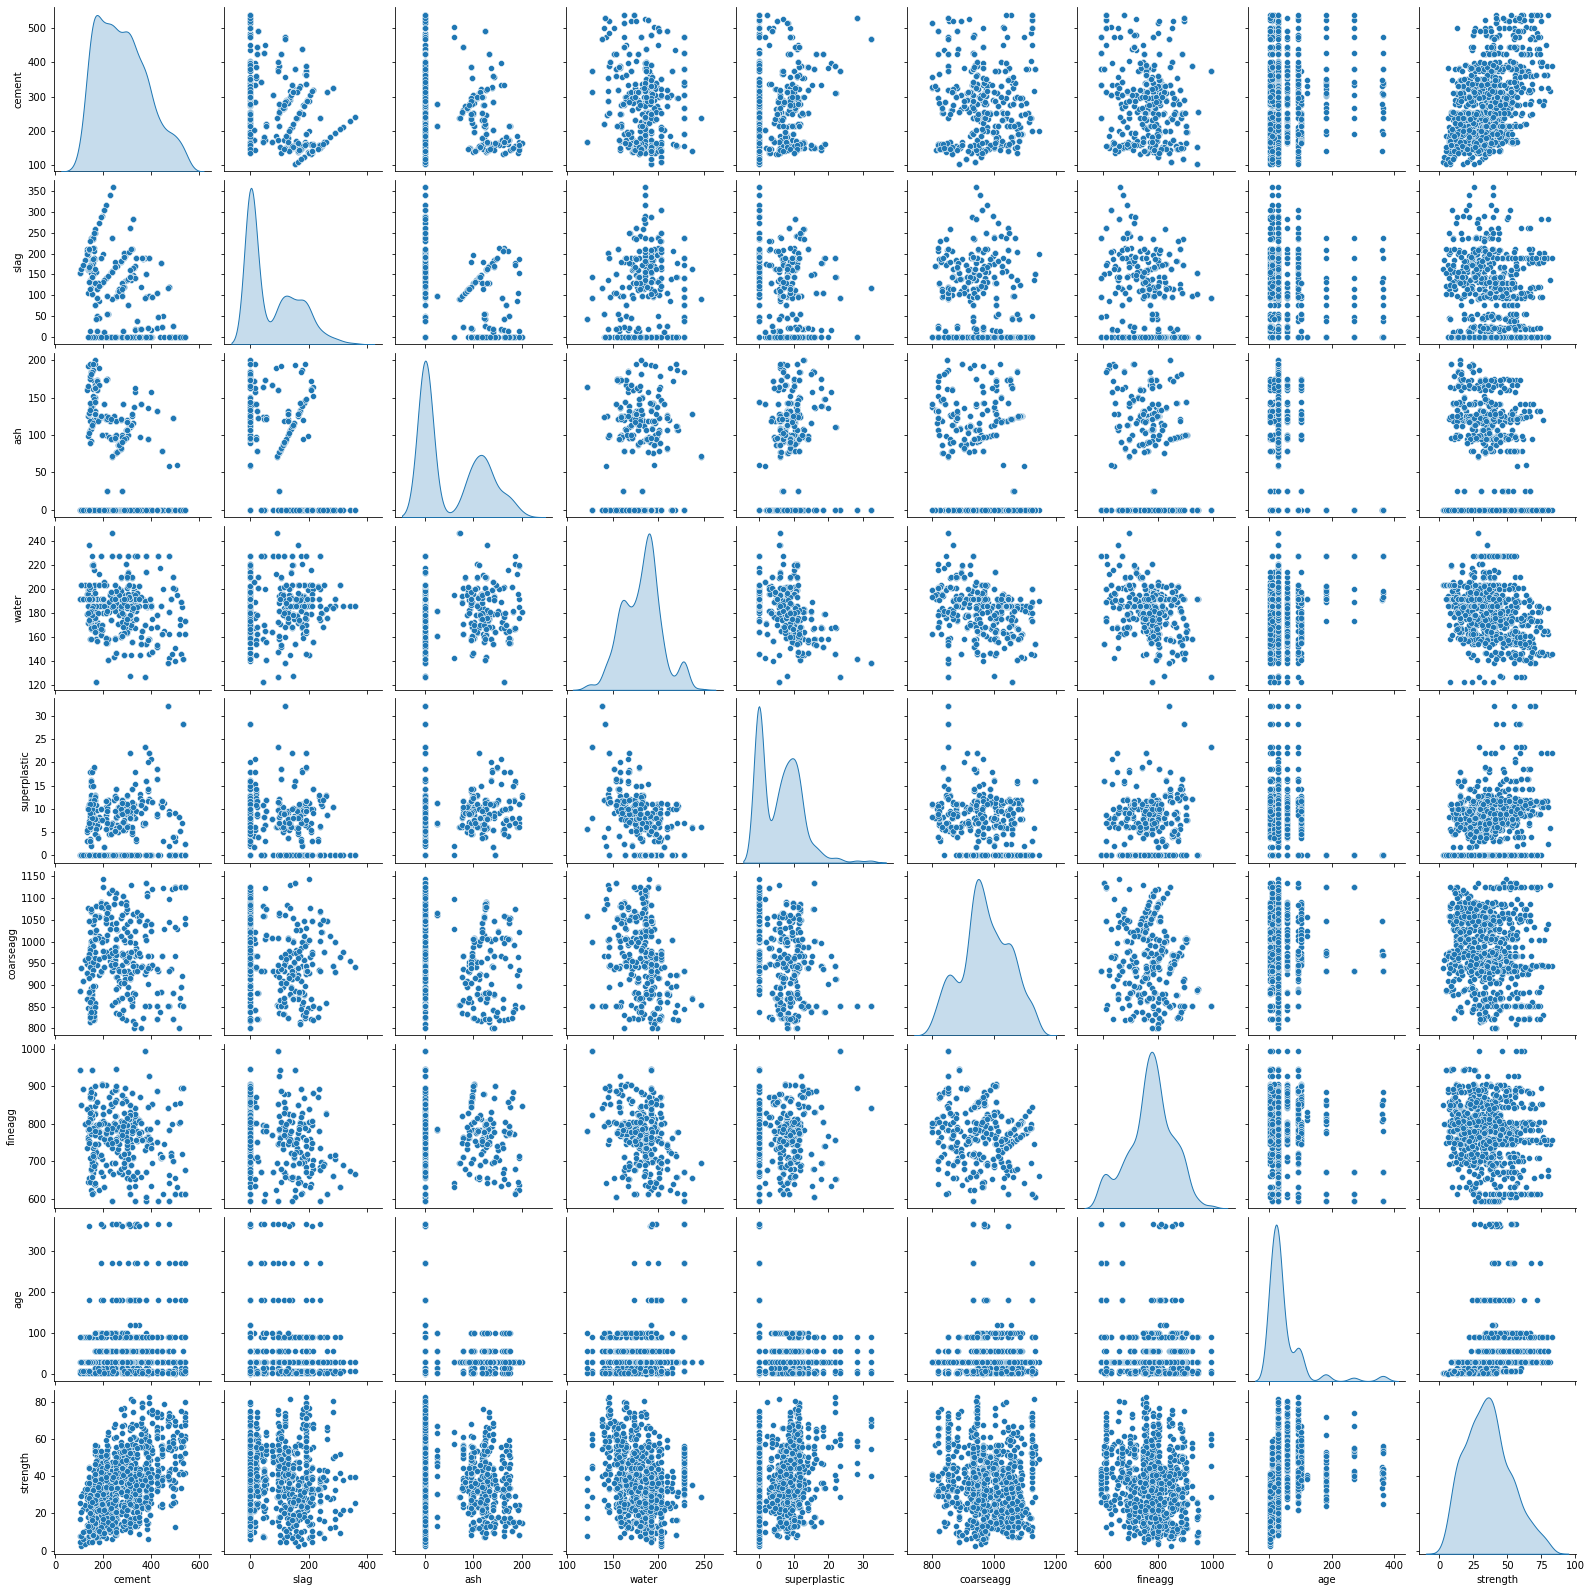

In [8]:
sns.pairplot(demo, diag_kind="kde")

In [9]:
demo.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

# Few of elements are Posstively skewed, Hence using power tranformer to normalize

In [25]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
Normaldemo = pd.DataFrame(pt.fit_transform(demo))
Normaldemo.columns = demo.columns

In [21]:
Normaldemo.skew()

0   -0.018924
1   -0.025047
2    0.215248
3    0.003218
4   -0.161053
5   -0.018446
6   -0.012546
7   -0.000234
8   -0.053583
dtype: float64

# Skewness is normalised post power transformation

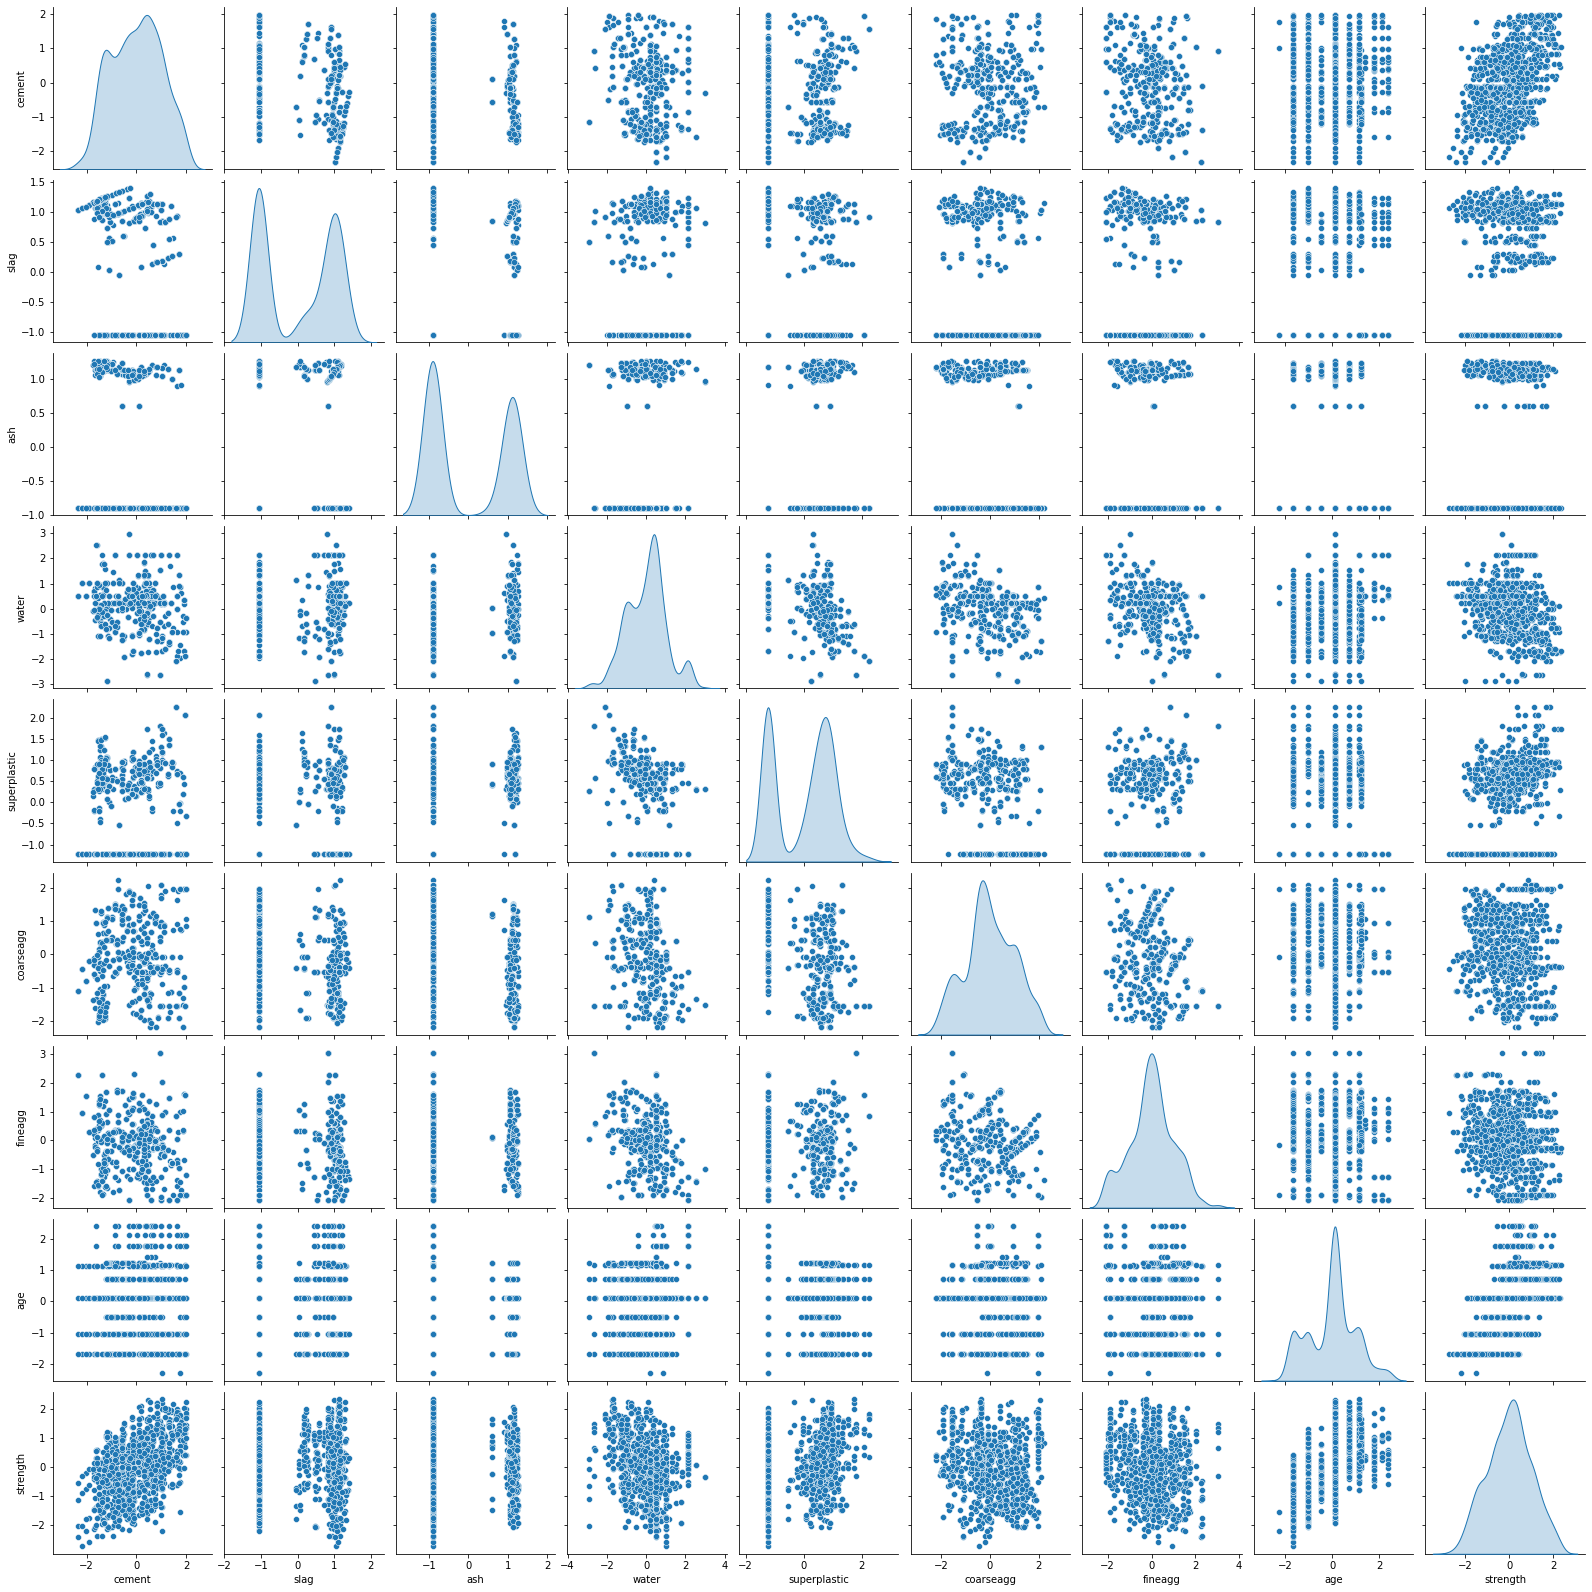

In [26]:
sns.pairplot(Normaldemo, diag_kind="kde")

# Linear Regression model Using all possible random state, StandardScalar and PolynomialFeatures

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
demo = pd.read_csv("concrete.csv")
X=demo.drop('strength',axis=1)
y=demo['strength']
poly=PolynomialFeatures(degree=1)
trainaccuracy=[]
testaccuracy=[]
for i in range(100):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=i)
    lr=LinearRegression()
    polyXtrain = poly.fit_transform(Xtrain)
    polyXtest=poly.transform(Xtest)
    lr.fit(polyXtrain,ytrain)
    trainaccuracy.append(lr.score(polyXtrain,ytrain))#Fidnding mean of training accuracy from the appended list
    testaccuracy.append(lr.score(polyXtest,ytest))
print("Training Accuracy")
print(np.mean(trainaccuracy))
print("Testing Accuracy")
print(np.mean(testaccuracy))
print("Predicted srength using trained data\n",lr.predict(polyXtest))

Training Accuracy
0.6167516086911289
Testing Accuracy
0.599892727838963
Predicted srength using trained data
 [31.79918941 19.12497526 25.8516209  45.97196947 33.19779761 30.5866677
 21.84498906 43.57434845 33.78201269 25.99499701 33.80427114 60.26080158
 24.24378809 56.64013458 39.95056727 50.26778808 38.86293702 20.34403215
 17.61224371 29.3760554  50.61944917 30.55212023 18.46517834 50.91916304
 17.34286972 22.3986734  46.06274656 44.04903322 43.42111635 18.77009124
 36.98833753 21.58539637 34.82744866 38.73855286 37.26785298 27.35372084
 11.00221746 40.25338392 32.16899787 26.13504273 22.1979597  30.62988675
 31.07707027 56.81394632 22.35507854 51.38256201 31.69062769 33.95057214
 32.02932851 27.57960165 32.90476082 60.73519984 33.19114231 31.26091218
 47.99266223 10.53011234 36.98887061 33.87436314 38.91439413 38.36173334
 26.13089235 46.39776844 30.63708487 37.35403132 49.98048855 27.48637351
 34.09396192 35.01587186 32.19227713 17.62883531 15.36561173 32.54628151
 20.08200111 59

# Linear Regression model Using all possible random state, StandardScalar and PolynomialFeatures
## Better Accuracy with 3rd Degree of Polynomial Features
## Root-Mean Squared Error value is more resulting better accuracy

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
demo = pd.read_csv("concrete.csv")
X=demo.drop('strength',axis=1)
y=demo['strength']
poly=PolynomialFeatures(degree=3)
trainaccuracy=[]
testaccuracy=[]
for i in range(100):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=i)
    sc=StandardScaler()
    lr=LinearRegression()
    polyXtrain = poly.fit_transform(Xtrain)
    polyXtest=poly.transform(Xtest)
    scaledpolyXtrain=sc.fit_transform(polyXtrain)
    scaledpolyXtest=sc.transform(polyXtest)
    lr.fit(scaledpolyXtrain,ytrain)
    trainaccuracy.append(lr.score(scaledpolyXtrain,ytrain))
    testaccuracy.append(lr.score(scaledpolyXtest,ytest))
print("Training Accuracy")
print(np.mean(trainaccuracy))
print("Testing Accuracy")
print(np.mean(testaccuracy))

Training Accuracy
0.9006511271365892
Testing Accuracy
0.8048415033104959


# Linear Regression model Using all possible random state, StandardScalar and PCA (Dimensionality Reduction)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')
demo = pd.read_csv('concrete.csv')
sc=StandardScaler()
pca=PCA(n_components=70)
poly=PolynomialFeatures(degree=3)
X=demo.drop('strength',axis=1)
y=demo['strength']
trainR2=[]
testR2=[]
trainR2PCA=[]
testR2PCA=[]
for i in range(100):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=i)
    Xtrain=poly.fit_transform(Xtrain)
    Xtest=poly.transform(Xtest)
    scaledXtrain=sc.fit_transform(Xtrain)
    scaledXtest=sc.transform(Xtest)
    pcascaledXtrain=pca.fit_transform(scaledXtrain)
    pcascaledXtest=pca.transform(scaledXtest)
    lr=LinearRegression()
    lr.fit(scaledXtrain,ytrain)
    lrpca=LinearRegression()
    lrpca.fit(pcascaledXtrain,ytrain)
    trainR2.append(lr.score(scaledXtrain,ytrain))
    testR2.append(lr.score(scaledXtest,ytest))
    trainR2PCA.append(lrpca.score(pcascaledXtrain,ytrain))
    testR2PCA.append(lrpca.score(pcascaledXtest,ytest))
print("Without PCA")
print("Testing R2")
print(np.mean(testR2))
print("Training R2")
print(np.mean(trainR2))
print("")
print("With PCA")
print("Testing R2")
print(np.mean(testR2PCA))
print("Training R2")
print(np.mean(trainR2PCA))#Here since there is no strong correlation dimensionality reduction using PCA has very less impact. Which mean better accuracy(Root mean squared error value is more) is found without dimensionality reduction

Without PCA
Testing R2
0.8048415033104959
Training R2
0.9006511271365892

With PCA
Testing R2
0.8401099891591932
Training R2
0.8782859643689599


In [3]:
pca.explained_variance_ratio_

array([2.60412917e-01, 1.89927922e-01, 1.44773958e-01, 1.21742656e-01,
       6.53002771e-02, 4.15838065e-02, 3.31336777e-02, 2.96000336e-02,
       1.98540954e-02, 1.89211676e-02, 1.34438780e-02, 1.11881354e-02,
       8.56305921e-03, 7.44334494e-03, 5.22110828e-03, 4.21053207e-03,
       3.56188062e-03, 2.88789858e-03, 2.57821098e-03, 2.35389896e-03,
       1.60231771e-03, 1.21746208e-03, 1.03216064e-03, 7.83021304e-04,
       7.46583394e-04, 6.34663793e-04, 6.02497208e-04, 5.28298769e-04,
       4.88388151e-04, 4.49412197e-04, 4.22010378e-04, 4.13370129e-04,
       3.93337419e-04, 3.80811024e-04, 3.54695453e-04, 2.97255119e-04,
       2.86406747e-04, 2.50634568e-04, 2.35318530e-04, 2.06934333e-04,
       1.86274581e-04, 1.65977453e-04, 1.49450559e-04, 1.38505882e-04,
       1.26336708e-04, 1.19772254e-04, 1.10479636e-04, 9.49326997e-05,
       7.90204406e-05, 7.67603291e-05, 6.50192464e-05, 6.26206303e-05,
       5.66932830e-05, 5.53255694e-05, 5.05775082e-05, 3.80098789e-05,
      